In [44]:
%matplotlib inline

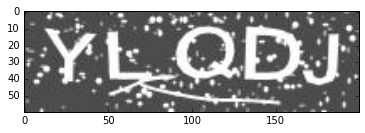

In [45]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("CaptchaImage.jpg")
plt.imshow(img)

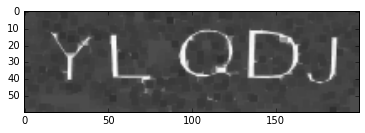

In [67]:
import numpy as np
kernel = np.ones((4,4), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
plt.imshow(erosion)




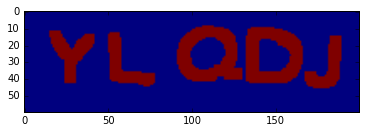

In [68]:
blurred = cv2.GaussianBlur(erosion, (5, 5), 0) #高斯滤波器滤掉杂讯

edged = cv2.Canny(blurred, 30, 150) # Canny算子来实现边缘检测

dilation = cv2.dilate(edged, kernel, iterations = 1) # opencv膨胀算子实现填充效果,还原回来正常的效果
plt.imshow(dilation)

In [73]:
# 检测她的轮廓
image, contours, hierarchy = cv2.findContours(dilation.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
# 将资料放在cnts里
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key = lambda x:x[1])

ary = []
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
#     print x, y, w, h
    if w > 21 and h > 23:
        ary.append((x, y, w, h))
    
        

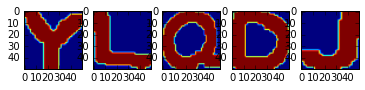

In [75]:
fig = plt.figure()
for id, (x, y, w, h) in enumerate(ary):
    roi = dilation[y:y + h, x:x + w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id + 1)
    res = cv2.resize(thresh, (50,50))
    cv2.imwrite('%d.png'%(id), res)
#     plt.imshow(thresh)
    plt.imshow(res)

In [50]:
print ary

[(15, 12, 27, 31), (50, 13, 28, 32), (91, 9, 39, 33), (98, 15, 23, 21), (132, 10, 34, 33), (139, 16, 21, 21), (167, 15, 22, 31)]


In [51]:
import string 
d = dict.fromkeys(string.ascii_uppercase, 0)
a = [i for i in d.keys()]
a.sort()
for i in a:
    print i,

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z


In [52]:
pic0 = cv2.imread("0.png")
pic1 = cv2.imread("1.png")
pic2 = cv2.imread("2.png")
pic3 = cv2.imread("3.png")
pic4 = cv2.imread("4.png")

def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

print mse(pic0, pic3)
print mse(pic1, pic3)
print mse(pic2, pic3)



107959.9128
74599.074
100537.83


In [53]:
import os 

def getNumber(pic):
    min_a = 9999999999
    min_png = None
    for png in os.listdir('alphabet'):
        ref = cv2.imread('alphabet/' + png)
        if mse(ref, pic) < min_a:
            min_a = mse(ref, pic)
            min_png = png
        return min_png, min_a
    
print getNumber(pic0)

WindowsError: [Error 3] : 'alphabet/*.*'